<a href="https://colab.research.google.com/github/springboardmentor789r/AgriYield/blob/Intern_SaniyaMariyam/AgriYield_Predictor(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_excel('crop_yield_dataset.xlsx')

df.head(10)

Saving crop_yield_dataset.xlsx to crop_yield_dataset.xlsx


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
5,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
6,2014-01-01,Sugarcane,Saline,8.00,13.533004,80.000000,9.910484,84.5,66.0,54.0,0.000000,17.041667
7,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667
8,2014-01-01,Potato,Peaty,5.50,18.895963,80.000000,6.696707,60.5,45.0,31.5,54.259727,22.833333
9,2014-01-01,Sunflower,Loamy,6.50,16.865595,80.000000,9.311649,70.0,66.0,55.0,68.119250,63.666667


In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


Original Data Shape: (36520, 12)
After cleaning → Shape: (25495, 12)

Train Shape: (20396, 11) | Test Shape: (5099, 11)

Converting datetime columns: ['Date'] to numeric features...

Categorical Columns used by CatBoost: ['Crop_Type', 'Soil_Type']

Training CatBoost Regressor...

0:	learn: 21.6601124	test: 21.7588198	best: 21.7588198 (0)	total: 70.8ms	remaining: 1m 10s
100:	learn: 5.2170588	test: 5.0302847	best: 5.0302847 (100)	total: 3.38s	remaining: 30.1s
200:	learn: 4.6553145	test: 4.6785786	best: 4.6785786 (200)	total: 8.79s	remaining: 34.9s
300:	learn: 4.4943526	test: 4.6073893	best: 4.6073893 (300)	total: 13.8s	remaining: 32s
400:	learn: 4.3918829	test: 4.5890841	best: 4.5889921 (399)	total: 19.3s	remaining: 28.9s
500:	learn: 4.2998016	test: 4.5798314	best: 4.5798314 (500)	total: 21.3s	remaining: 21.2s
600:	learn: 4.2144042	test: 4.5745905	best: 4.5736105 (572)	total: 23.3s	remaining: 15.5s
700:	learn: 4.1260936	test: 4.5730825	best: 4.5713265 (671)	total: 25.3s	remaining: 10.8s


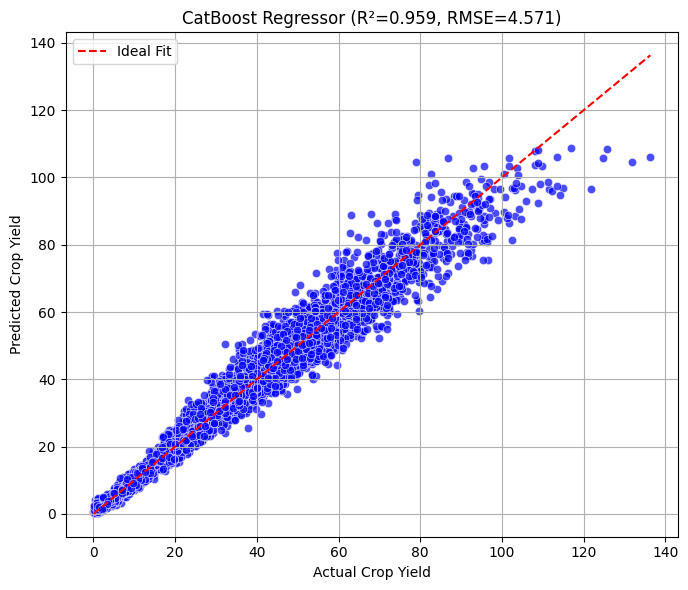


Top 10 Important Features:
         Feature  Importance
3    Temperature   40.999271
9   Soil_Quality   17.453434
4       Humidity   15.724003
6              N   11.709473
0      Crop_Type    5.718521
7              P    3.696611
2        Soil_pH    2.817360
8              K    1.207178
5     Wind_Speed    0.183286
12      Date_day    0.152374


/tmp/ipython-input-2215550998.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')


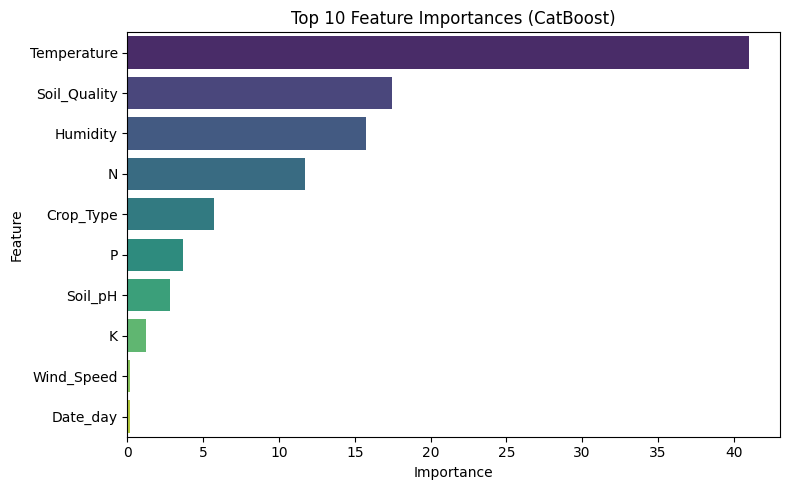

In [4]:
# CatBoost Regressor for Crop Yield Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and Clean Data
print("Original Data Shape:", df.shape)

# Detect target column (Crop Yield)
target_col = next((col for col in df.columns if "yield" in col.lower()), None)
if target_col is None:
    raise ValueError("Target column (Crop Yield) not found!")

# Drop missing and zero-yield rows
df = df.dropna()
df = df[df[target_col] != 0].reset_index(drop=True)
print(f"After cleaning → Shape: {df.shape}\n")

# Split data into features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train Shape: {X_train.shape} | Test Shape: {X_test.shape}\n")

# Handle Datetime Columns
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns
if len(datetime_cols) > 0:
    print(f"Converting datetime columns: {list(datetime_cols)} to numeric features...\n")
    for col in datetime_cols:
        X_train[col] = pd.to_datetime(X_train[col])
        X_test[col] = pd.to_datetime(X_test[col])

        # Extract useful parts
        for part in ["year", "month", "day"]:
            X_train[f"{col}_{part}"] = getattr(X_train[col].dt, part)
            X_test[f"{col}_{part}"] = getattr(X_test[col].dt, part)

        # Drop original datetime column
        X_train = X_train.drop(columns=[col])
        X_test = X_test.drop(columns=[col])

# Identify Categorical Columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Columns used by CatBoost: {categorical_cols}\n")

# Define CatBoost Model
cat_model = CatBoostRegressor(
    iterations=1000,          # number of boosting iterations
    depth=8,                  # depth of trees
    learning_rate=0.05,       # learning rate
    loss_function='RMSE',     # objective function
    eval_metric='RMSE',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=100               # print progress every 100 iterations
)

# Create CatBoost Pool (handles categorical features efficiently)
train_pool = Pool(X_train, y_train, cat_features=categorical_cols)
test_pool = Pool(X_test, y_test, cat_features=categorical_cols)

# Train the Model
print("Training CatBoost Regressor...\n")
cat_model.fit(train_pool, eval_set=test_pool, use_best_model=True)

# Evaluate Model
y_pred = cat_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n=== CatBoost Regressor Evaluation ===")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# Visualization
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title(f"CatBoost Regressor (R²={r2:.3f}, RMSE={rmse:.3f})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cat_model.get_feature_importance(train_pool)
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()


In [5]:
# Compare Train vs Test Predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Make predictions on both train and test data
y_train_pred = cat_model.predict(X_train)
y_test_pred = cat_model.predict(X_test)

# Evaluate on Training Data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on Test Data (already done earlier)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Display Results
print("=== Train vs Test Performance Comparison ===")
print(f"Training  → MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Testing   → MAE: {test_mae:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

# Combine a few predictions for comparison
comparison_df = pd.DataFrame({
    "Actual (Train/Test Combined)": np.concatenate([y_train.values[:10], y_test.values[:10]]),
    "Predicted (Train/Test Combined)": np.concatenate([y_train_pred[:10], y_test_pred[:10]]),
    "Dataset": ["Train"]*10 + ["Test"]*10
})

print("\nSample Comparison (First 10 from Train and Test):")
print(comparison_df)


=== Train vs Test Performance Comparison ===
Training  → MAE: 2.9881, RMSE: 4.1925, R²: 0.9649
Testing   → MAE: 3.2180, RMSE: 4.5713, R²: 0.9586

Sample Comparison (First 10 from Train and Test):
    Actual (Train/Test Combined)  Predicted (Train/Test Combined) Dataset
0                      55.370416                        62.831279   Train
1                      50.923346                        51.289630   Train
2                      24.020726                        27.876063   Train
3                      15.611734                        16.997890   Train
4                       5.953086                         5.730892   Train
5                      24.656417                        23.736127   Train
6                      22.154766                        22.735373   Train
7                      30.257146                        32.073506   Train
8                      57.706482                        53.789347   Train
9                      36.097035                        41.09234

In [6]:
import pickle

# Save Model using Pickle
model_filename = "catboost_crop_yield_model.pkl"

with open(model_filename, "wb") as file:
    pickle.dump(cat_model, file)

print(f"Model saved successfully as '{model_filename}'")

from google.colab import files
files.download(model_filename)


Model saved successfully as 'catboost_crop_yield_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>